In [1]:
import os
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Function to auto-install and load packages
def install_and_load(packages):
    import subprocess
    import sys
    for package in packages:
        try:
            __import__(package)
        except ImportError:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])

In [4]:
# List of packages to install and load
packages = ['pandas', 'numpy', 'factor_analyzer', 'matplotlib', 'seaborn']
install_and_load(packages)


In [5]:
os.chdir('D:\\R Studio')

In [6]:
survey_df = pd.read_csv('Survey.csv')

In [7]:
# Select the relevant subset of the dataframe
sur_int = survey_df.iloc[:, 19:46]

In [8]:
# Perform Factor Analysis with Varimax rotation
factor_analysis = FactorAnalyzer(n_factors=4, rotation='varimax')
factor_analysis.fit(sur_int)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

In [9]:
# Get loadings
loadings = factor_analysis.loadings_
print("Factor Loadings:\n", loadings)

Factor Loadings:
 [[-0.08623576 -0.08097401  0.05315632  0.53865209]
 [-0.04707896  0.28171261 -0.01654391 -0.01672453]
 [ 0.6905913   0.14264745  0.28810837 -0.06920569]
 [ 0.46651738  0.16352419 -0.12485364  0.23247143]
 [ 0.51962226  0.24855043 -0.14283398  0.03864646]
 [ 0.36211264  0.23805115  0.04245436 -0.02913032]
 [ 0.34740792  0.36086054 -0.03312095  0.66001611]
 [ 0.75282616 -0.10094499 -0.08331999  0.3846903 ]
 [ 0.67108357  0.29439858  0.30171478 -0.34424643]
 [ 0.06500836  0.1496368  -0.10846898 -0.01470873]
 [ 0.61153682  0.43213105 -0.04932627 -0.02471042]
 [ 0.40487719  0.55433414 -0.08677656 -0.09343654]
 [ 0.75646745  0.32873909 -0.0179094  -0.0272586 ]
 [ 0.05460304  0.40691287 -0.06720388  0.43833868]
 [ 0.080124   -0.01917882  0.51626193 -0.1381047 ]
 [-0.0867624  -0.05489171  0.52029272  0.24907904]
 [-0.04512192 -0.14102083  0.30281758 -0.048089  ]
 [-0.14555111  0.00722171  0.87170747 -0.09429573]
 [ 0.2035555   0.57780858 -0.15702557  0.23438127]
 [ 0.23101554

In [10]:
# Get communalities
communalities = factor_analysis.get_communalities()
print("Communalities:\n", communalities)

Communalities:
 [0.30696506 0.08213184 0.5850605  0.31401002 0.3536797  0.19044486
 0.68763085 0.73186597 0.74656109 0.03859913 0.56375821 0.48747243
 0.68137617 0.36521674 0.29238697 0.3432857  0.1159339  0.79000288
 0.4548892  0.16758334 0.61723155 0.56001817 0.14540835 0.76152135
 0.83047841 0.81065455 0.84587807]


In [14]:
# Get factor scores
factor_scores = factor_analysis.transform(sur_int)
print("Factor Scores:\n", factor_scores)

Factor Scores:
 [[-1.09528652  0.7987394  -0.7659346   1.57491385]
 [-1.66985922 -0.24481208 -0.71463576  0.94776254]
 [ 0.01535895 -2.33438132 -1.58082914  1.74185288]
 [ 2.09487107  0.32749493 -1.9137533   0.18456563]
 [ 0.7776646  -0.71036137 -0.66317678 -1.06551577]
 [-0.31356385 -0.10184317 -0.65549416  0.233377  ]
 [ 0.40977403  1.14730232  0.13630682  0.61372305]
 [-2.63060124  0.20923992 -1.17683708 -0.29947543]
 [-0.94812834 -0.09660172  0.21579682  0.03235978]
 [-0.46665553  1.37037408 -0.1579002  -0.89258192]
 [ 0.1634761  -1.15648298  0.10001698 -0.28563792]
 [-0.67472811 -0.40628596 -1.04965782 -1.09330024]
 [-0.21786304 -1.61568492  0.67012359  1.2399752 ]
 [-0.23926921  0.44858115  0.9793204   0.03851611]
 [-0.41350984 -0.85539967 -0.08088519  0.69892188]
 [-2.21782882 -0.99440823  0.35976629  0.24275519]
 [-1.75188321  0.30384685 -0.51530289 -0.99127656]
 [-1.50187596  0.63994998 -0.25417616  0.81185332]
 [-0.07756325  1.38951498 -1.36109107  0.71052438]
 [ 0.90665447 -

In [16]:
# Create a dataframe for the loadings and reorder the columns based on highest loadings
loadings_df = pd.DataFrame(loadings, columns=[f'Factor{i+1}' for i in range(loadings.shape[1])], index=sur_int.columns)
sorted_loadings_df = loadings_df.loc[:, (loadings_df.abs().max().sort_values(ascending=False).index)]

print("Factor Loadings with Factor Names:\n", sorted_loadings_df)

Factor Loadings with Factor Names:
                                             Factor3   Factor2   Factor1  \
3. Proximity to transport                  0.053156 -0.080974 -0.086236   
4. Proximity to work place                -0.016544  0.281713 -0.047079   
5. Proximity to shopping                   0.288108  0.142647  0.690591   
1. Gym/Pool/Sports facility               -0.124854  0.163524  0.466517   
2. Parking space                          -0.142834  0.248550  0.519622   
3.Power back-up                            0.042454  0.238051  0.362113   
4.Water supply                            -0.033121  0.360861  0.347408   
5.Security                                -0.083320 -0.100945  0.752826   
1. Exterior look                           0.301715  0.294399  0.671084   
2. Unit size                              -0.108469  0.149637  0.065008   
3. Interior design and branded components -0.049326  0.432131  0.611537   
4. Layout plan (Integrated etc.)          -0.086777  0.554334  0

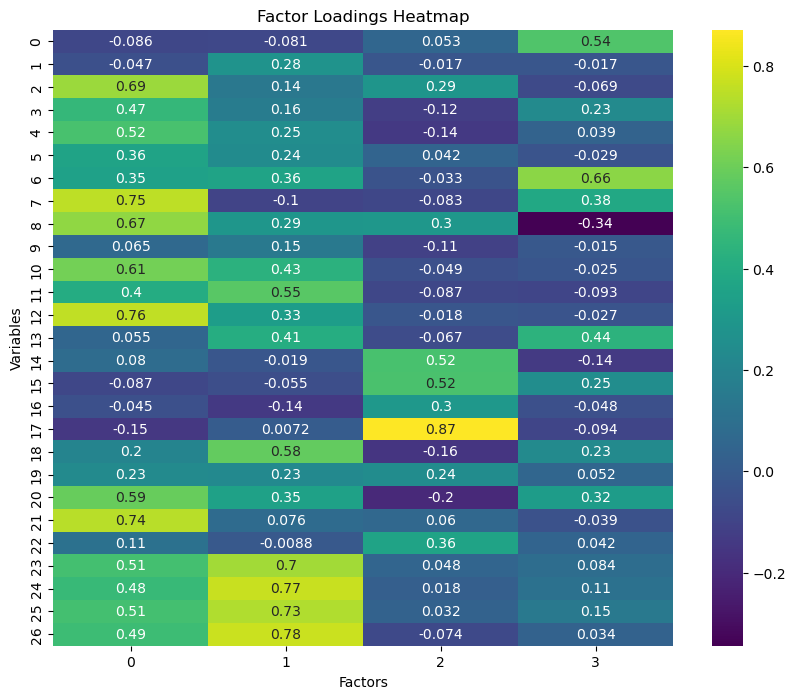

In [12]:
# Plotting the loadings
plt.figure(figsize=(10, 8))
sns.heatmap(loadings, annot=True, cmap='viridis')
plt.title('Factor Loadings Heatmap')
plt.xlabel('Factors')
plt.ylabel('Variables')
plt.show()

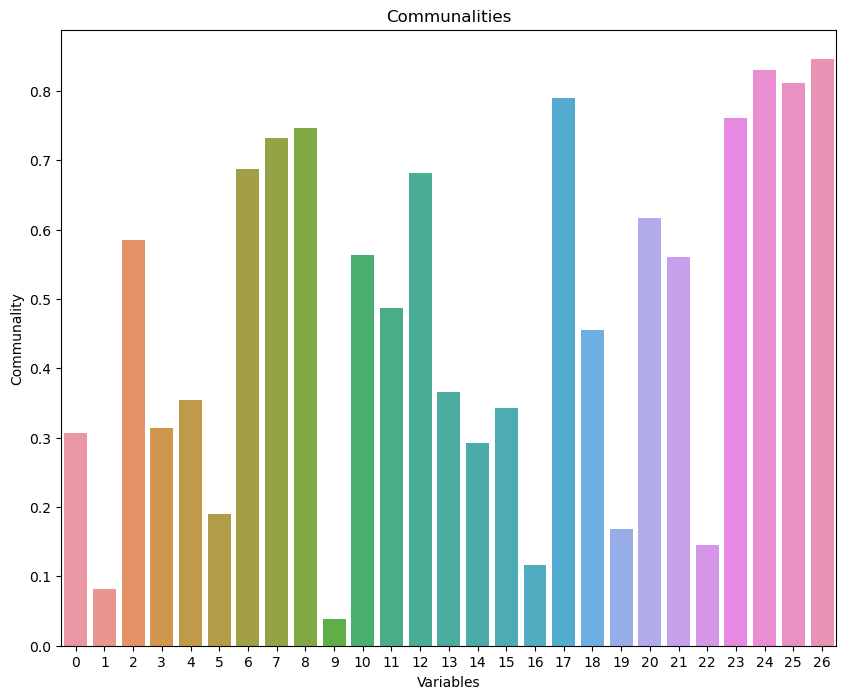

In [13]:
# Plotting the communalities
plt.figure(figsize=(10, 8))
sns.barplot(x=np.arange(len(communalities)), y=communalities)
plt.title('Communalities')
plt.xlabel('Variables')
plt.ylabel('Communality')
plt.show()